<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/CNN_Deep_Dive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Deep Dive – Convolution, Pooling, Flattening

Understanding how CNN layers work (Conv2D, MaxPooling2D, Flatten) by visualizing them in action using the MNIST dataset.

## Loading and Preprocessing MNIST Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,Input
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), _ = mnist.load_data()

# Use only a small sample to speed up processing
X_train = X_train[:1000].reshape(-1, 28, 28, 1).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Building a CNN Model for Visualization

In [2]:
input_tensor = Input(shape=(28, 28, 1))
x = layers.Conv2D(8, (3, 3), activation='relu')(input_tensor)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

model = models.Model(inputs=input_tensor, outputs=x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,248 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

## Activation Model
The "activation model" is a way to access and visualize the output of each layer in our CNN model. Normally, when a CNNis trained, only the final output is accessible (e.g., the classification probability). However, to understand what each convolutional and pooling layer is learning, we need to see the feature maps they produce.

The activation model is built using the Keras Functional API. A new `Model` is defined where:

*   The input is the same as the original model's input (`model.input`).
*   The outputs are a list of the outputs from *each* layer in the original model (`[layer.output for layer in model.layers]`).

By compiling and using this `activation_model` to make predictions on an image, we get a list of NumPy arrays, where each array represents the output (activations) of a corresponding layer in the original CNN for that specific input image.

We then iterate through these activations, normalize them for better visualization, and display them as images. This allows us to see how the initial input image is transformed by each layer, revealing the features that the network is detecting at different stages of processing.
##Visualize Intermediate Activations

In [3]:
image = X_train[0].reshape(1, 28, 28, 1)

# Create the activation model using the functional model
activation_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

# Get activations
activations = activation_model.predict(image)
layer_names = [layer.name for layer in model.layers]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


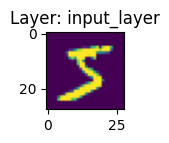

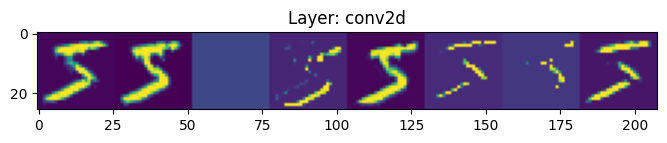

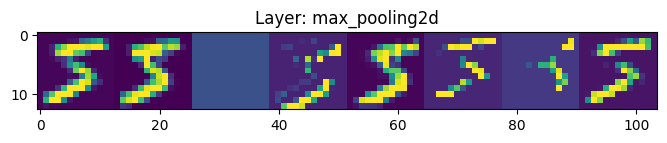

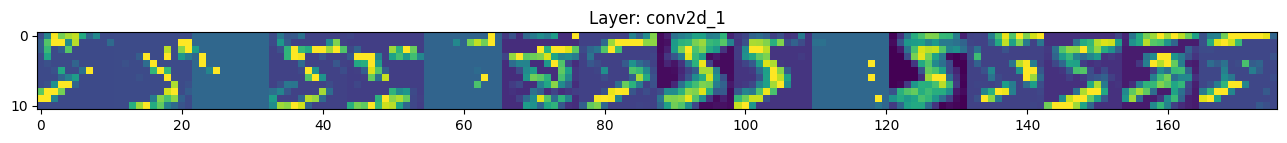

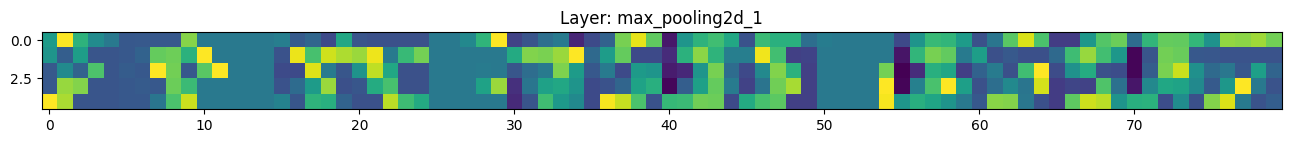

In [4]:
# Exclude the InputLayer from visualization as it doesn't have activations in the same sense
# Adjust layer_names and activations accordingly
layer_names = layer_names[:]
activations = activations[:]

for layer_name, activation in zip(layer_names, activations):
    num_features = activation.shape[-1]
    size = activation.shape[1]
    display_grid = np.zeros((size, size * num_features))

    for i in range(num_features):
        activation_map = activation[0, :, :, i]
        activation_map -= activation_map.mean()
        activation_map /= (activation_map.std() + 1e-5)
        activation_map *= 64
        activation_map += 128
        activation_map = np.clip(activation_map, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = activation_map

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(f"Layer: {layer_name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

## Take away from activation model visualization
- Conv2D filters help detect features like edges, patterns, shapes
- MaxPooling reduces feature map size, making computation efficient

NOTE: A CNN architecture also comprises of several flatterned dense layers in the sequence after the final MaxPooling layer which are not depected here.